# Test

In [1]:
import numpy as np
import pandas as pd
import sys

filename = "dataset_test.txt"


In [5]:
dataset = pd.read_csv(filename, sep='\\s+', header=None).values
print(dataset.shape)

#dataset = np.append(dataset, np.zeros((dataset.shape[0], 6)), axis=1)
dataset.shape


(5000, 1025)


(5000, 1025)

In [6]:
dataset_feature = dataset[0:50000, 1:]
dataset_target = dataset[0:50000, 0]
print(dataset_feature.shape)

nfeature = 1
ntime = dataset_feature.shape[1]
nsample = dataset_feature.shape[0]

dataset_feature = dataset_feature.reshape(nsample, ntime, nfeature)
print(dataset_feature.shape)
type(dataset_target)


(5000, 1024)
(5000, 1024, 1)


numpy.ndarray

In [8]:
from keras.models import load_model

model = load_model('cluster_num_regression.h5')

In [9]:
predicted = model.predict(dataset_feature)
#print(predicted.shape)
#print(dataset_target.shape)
#print(predicted)

predicted = predicted.reshape(nsample,)
#print(predicted)

diff = predicted - dataset_target
print(diff)


[-2.19421387 -0.99744225 -1.3584671  ...  0.65006828  0.28272629
  1.4437933 ]


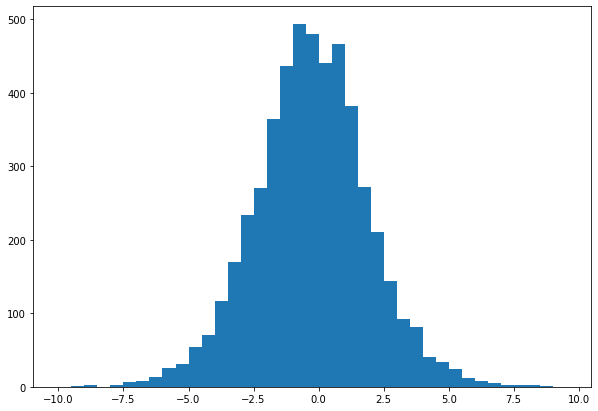

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(diff, bins = np.arange(-10, 10, 0.5))
plt.savefig('test_diff.png')

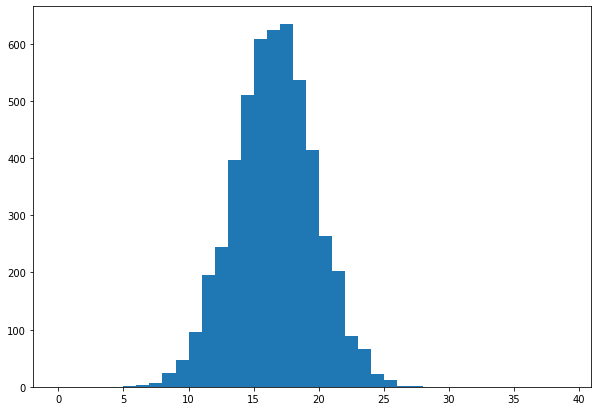

In [11]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(predicted, bins = np.arange(0, 40, 1))
plt.savefig('test_pred.png')

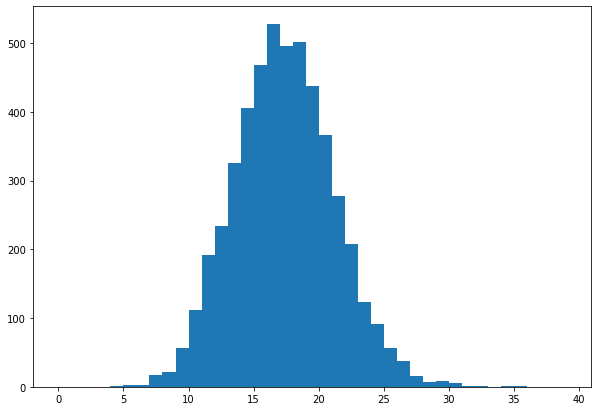

In [12]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(dataset_target, bins = np.arange(0, 40, 1))
plt.savefig('test_target.png')


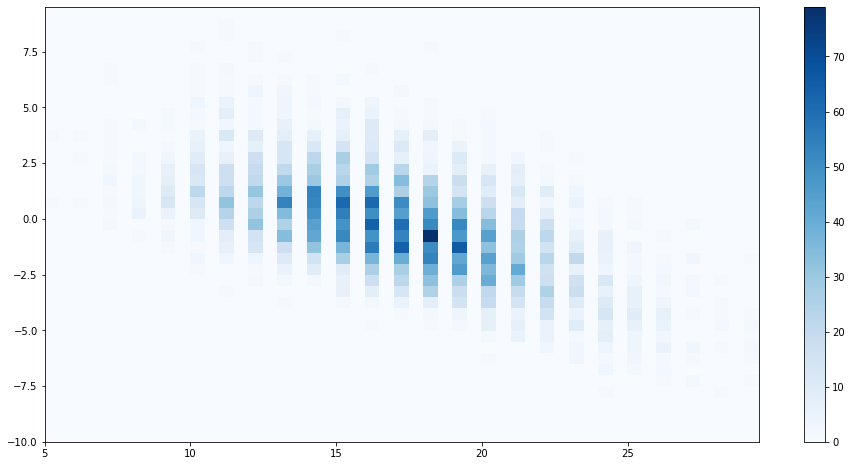

In [13]:
fig, ax = plt.subplots(figsize = (16, 8))
hh = ax.hist2d(dataset_target, diff, bins = [np.arange(5, 30, 0.5), np.arange(-10, 10, 0.5)], cmap='Blues')
cb = fig.colorbar(hh[3], ax=ax)
fig.savefig('diff_vs_truth.png')

In [14]:
import ROOT
from ROOT import TH1F, TCanvas

ROOT.gStyle.SetOptFit(1)
c = TCanvas('c', 'c', 800, 600)

## target
h1 = TH1F('h_target', 'h_target', 50, 0, 50)
for v in dataset_target:
    h1.Fill(v)
h1.Draw()
h1.Fit('gaus')
c.Print('test_target_fit.png')

## pred
h2 = TH1F('h_pred', 'h_pred', 50, 0, 50)
for v in predicted:
    h2.Fill(v)
h2.Draw()
h2.Fit('gaus')
c.Print('test_pred_fit.png')
    
## input
#h2 = TH1F('h_pred', 'h_pred', 50, 0, 50)
#for v in predicted:
#    h2.Fill(v)
#h2.Draw()
#h2.Fit('gaus')
#c.Print('test_pred_fit.png')


Welcome to JupyROOT 6.22/03
